In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from typing import List
import glob

In [3]:
list_dir = glob.glob('/home/phu/Downloads/Lorenz_new/**')

In [4]:
list_dir

['/home/phu/Downloads/Lorenz_new/precal_lorenz_points_001_300.npy',
 '/home/phu/Downloads/Lorenz_new/precal_lorenz_0001_700.npy',
 '/home/phu/Downloads/Lorenz_new/precal_lorenz_points_0001_500.npy',
 '/home/phu/Downloads/Lorenz_new/precal_lorenz_points_0.npy',
 '/home/phu/Downloads/Lorenz_new/precal_lorenz_001_200.npy',
 '/home/phu/Downloads/Lorenz_new/precal_lorenz_points_0001_800.npy',
 '/home/phu/Downloads/Lorenz_new/precal_lorenz_points_0001_700.npy',
 '/home/phu/Downloads/Lorenz_new/precal_lorenz_001_400.npy',
 '/home/phu/Downloads/Lorenz_new/precal_lorenz_points_1.npy',
 '/home/phu/Downloads/Lorenz_new/precal_lorenz_1.npy',
 '/home/phu/Downloads/Lorenz_new/precal_lorenz_0.npy',
 '/home/phu/Downloads/Lorenz_new/precal_lorenz_001_300.npy',
 '/home/phu/Downloads/Lorenz_new/precal_lorenz_0001_500.npy',
 '/home/phu/Downloads/Lorenz_new/precal_lorenz_points_001_200.npy',
 '/home/phu/Downloads/Lorenz_new/precal_lorenz_0001_800.npy',
 '/home/phu/Downloads/Lorenz_new/precal_lorenz_001_500

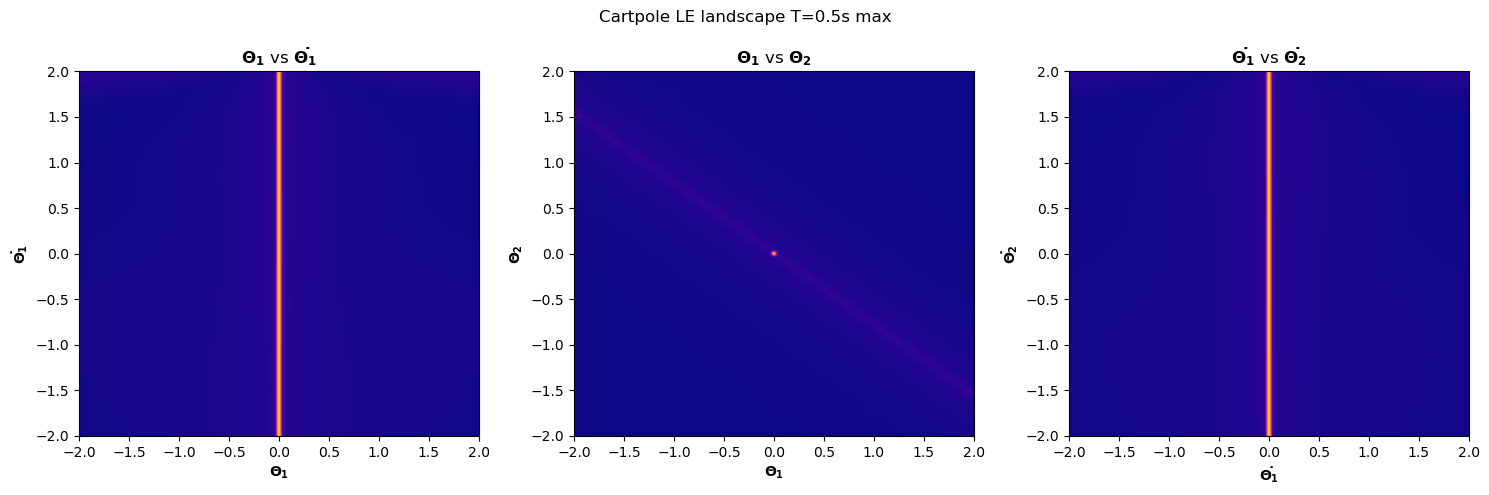

In [61]:
zs1 = np.load('/home/phu/Downloads/Lorenz_new/precal_lorenz_001_500.npy')
X_reshaped = np.load('/home/phu/Downloads/Lorenz_new/precal_lorenz_points_001_500.npy')

# l1 = zs[:,0].reshape(21, 21, 21, 21)
# l1[10][10][15][10] = 100

zs_sum_pos = []
for i in zs1:
    zs_sum_pos.append(sum(i[i>0]))
zs = np.array(zs_sum_pos)

# zs_max_pos = []
# for i in zs1:
#     zs_max_pos.append(max(i))
# zs = np.array(zs_max_pos)
# zs = zs1[:,0]

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
l1 = zs.reshape(101, 101, 101)[:,:,50]
ax1.imshow(np.flip(l1,1),extent=[-2, 2,-2,2],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax1.plot(tjt[0],tjt[2],linewidth=3, c='white')
ax1.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\dot{\Theta_1}}$")
ax1.set_xlabel(r"$\mathbf{\Theta_1}$")
ax1.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$")
ax2 = fig.add_subplot(132)
l2 = zs.reshape(101, 101, 101)[50,:,:]
ax2.imshow(np.flip(l2,1),extent=[-2, 2,-2,2],cmap='plasma',aspect='auto',interpolation="bilinear")
ax2.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\Theta_2}$")
ax2.set_xlabel(r"$\mathbf{\Theta_1}$")
ax2.set_ylabel(r"$\mathbf{\Theta_2}$")
ax3 = fig.add_subplot(133)
l3 = zs.reshape(101, 101, 101)[:,50,:]
ax3.imshow(np.flip(l3,1),extent=[-2, 2,-2,2],cmap='plasma',aspect='auto',interpolation="bilinear")
ax3.set_title(r"$\mathbf{\dot{\Theta_1}}$ vs $\mathbf{\dot{\Theta_2}}$")
ax3.set_xlabel(r"$\mathbf{\dot{\Theta_1}}$")
ax3.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
# ax4 = fig.add_subplot(111)
# l4 = zs.reshape(11, 11, 11, 11)[:,:,5,5]
# ax4.imshow(np.flip(l4,1),extent=[0, 2*np.pi,-8,8],cmap='plasma',aspect='auto',interpolation="bilinear")
# # ax4.plot(tjt[1],tjt[3],linewidth=3, c='white')
# ax4.set_title(r"$\mathbf{\Theta}$ vs $\mathbf{\dot{\Theta}}$")
# ax4.set_xlabel(r"$\mathbf{\Theta}$")
# ax4.set_ylabel(r"$\mathbf{\dot{\Theta}}$")

fig.suptitle('Cartpole LE landscape T=0.5s max')
fig.tight_layout()
# plt.savefig('/home/phu/Downloads/Cartpole_3/frame/10.png')

In [49]:
zs1

array([[ -0.6437681 , -10.31834341, -19.27389089],
       [ -0.61786572, -10.38218857, -19.23594811],
       [ -0.59173702, -10.44717745, -19.19708793],
       ...,
       [ -4.01750443, -10.59663215, -15.62186583],
       [ -4.05228414, -10.53128361, -15.65243466],
       [ -4.08664568, -10.46711965, -15.68223709]])

In [50]:
X_reshaped

array([[-2.  , -2.  , -2.  ],
       [-2.  , -1.96, -2.  ],
       [-2.  , -1.92, -2.  ],
       ...,
       [ 2.  ,  1.92,  2.  ],
       [ 2.  ,  1.96,  2.  ],
       [ 2.  ,  2.  ,  2.  ]])

In [51]:
print(X_reshaped[np.argmax(zs)],zs[np.argmax(zs)])

[ 0.  0. -2.] 28.33557231872625


In [258]:
sorted(glob.glob(f"/home/phu/Downloads/Cartpole_3/frame/*.png"))

['/home/phu/Downloads/Cartpole_3/frame/1.png',
 '/home/phu/Downloads/Cartpole_3/frame/10.png',
 '/home/phu/Downloads/Cartpole_3/frame/2.png',
 '/home/phu/Downloads/Cartpole_3/frame/3.png',
 '/home/phu/Downloads/Cartpole_3/frame/4.png',
 '/home/phu/Downloads/Cartpole_3/frame/5.png',
 '/home/phu/Downloads/Cartpole_3/frame/6.png',
 '/home/phu/Downloads/Cartpole_3/frame/7.png',
 '/home/phu/Downloads/Cartpole_3/frame/8.png',
 '/home/phu/Downloads/Cartpole_3/frame/9.png']

In [263]:
import glob
from PIL import Image
def make_gif(frame_folder):
    frames = [Image.open(image) for image in sorted(glob.glob(f"{frame_folder}/*.png"),reverse=True)]
    frame_one = frames[0]
    frame_one.save("cartpole_max.gif", format="GIF", append_images=frames,
               save_all=True, duration=300, loop=0)
    
if __name__ == "__main__":
    make_gif("/home/phu/Downloads/Cartpole_3/frame")

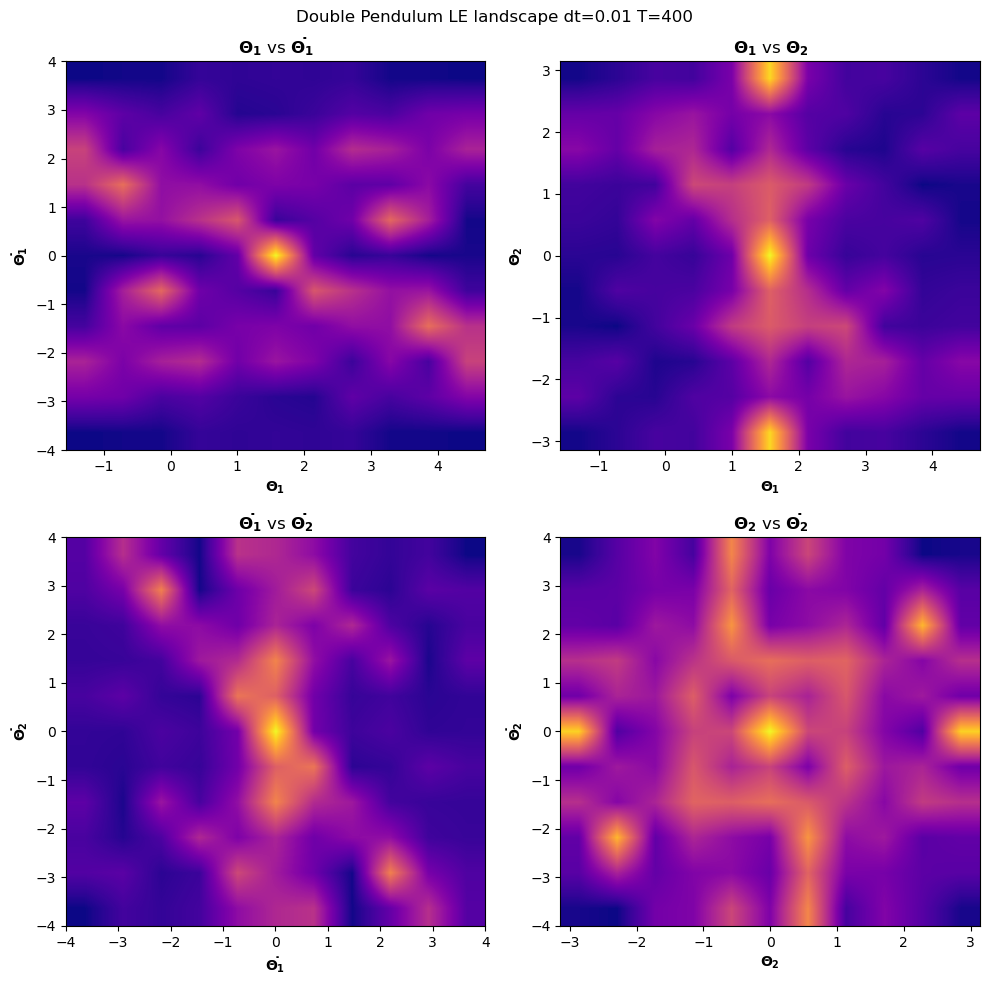

In [15]:
zs1 = np.load('/home/phu/Downloads/DP_experiment/precal_dp_400_001.npy')
X_reshaped = np.load('/home/phu/Downloads/DP_experiment/precal_dp_points_400_001.npy')

# l1 = zs[:,0].reshape(21, 21, 21, 21)
# l1[10][10][15][10] = 100

# zs_sum_pos = []
# for i in zs:
#     zs_sum_pos.append(sum(i[i>0]))
# zs = np.array(zs_sum_pos)
zs = zs1[:,0]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
l1 = zs.reshape(11, 11, 11, 11)[5,5,:,:]
ax1.imshow(np.flip(l1,1),extent=[-np.pi/2, 3*np.pi/2,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax1.plot(tjt[0],tjt[2],linewidth=3, c='white')
ax1.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\dot{\Theta_1}}$")
ax1.set_xlabel(r"$\mathbf{\Theta_1}$")
ax1.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$")
ax2 = fig.add_subplot(222)
l2 = zs.reshape(11, 11, 11, 11)[5,:,5,:]
ax2.imshow(np.flip(l2,1),extent=[-np.pi/2, 3*np.pi/2,-np.pi,np.pi],cmap='plasma',aspect='auto',interpolation="bilinear")
ax2.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\Theta_2}$")
ax2.set_xlabel(r"$\mathbf{\Theta_1}$")
ax2.set_ylabel(r"$\mathbf{\Theta_2}$")
ax3 = fig.add_subplot(223)
l3 = zs.reshape(11, 11, 11, 11)[:,5,5,:]
ax3.imshow(np.flip(l3,1),extent=[-4, 4,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
ax3.set_title(r"$\mathbf{\dot{\Theta_1}}$ vs $\mathbf{\dot{\Theta_2}}$")
ax3.set_xlabel(r"$\mathbf{\dot{\Theta_1}}$")
ax3.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
ax4 = fig.add_subplot(224)
l4 = zs.reshape(11, 11, 11, 11)[:,:,5,5]
ax4.imshow(np.flip(l4,1),extent=[-np.pi, np.pi,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax4.plot(tjt[1],tjt[3],linewidth=3, c='white')
ax4.set_title(r"$\mathbf{\Theta_2}$ vs $\mathbf{\dot{\Theta_2}}$")
ax4.set_xlabel(r"$\mathbf{\Theta_2}$")
ax4.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
fig.suptitle('Double Pendulum LE landscape dt=0.01 T=400')
fig.tight_layout()
plt.savefig('/home/phu/Dropbox/general_backup/mastering_chaos/DPLE_experiment/001400.png')

In [34]:
X_reshaped[np.argmax(zs)]

array([1.57079633, 0.        , 0.        , 0.        ])

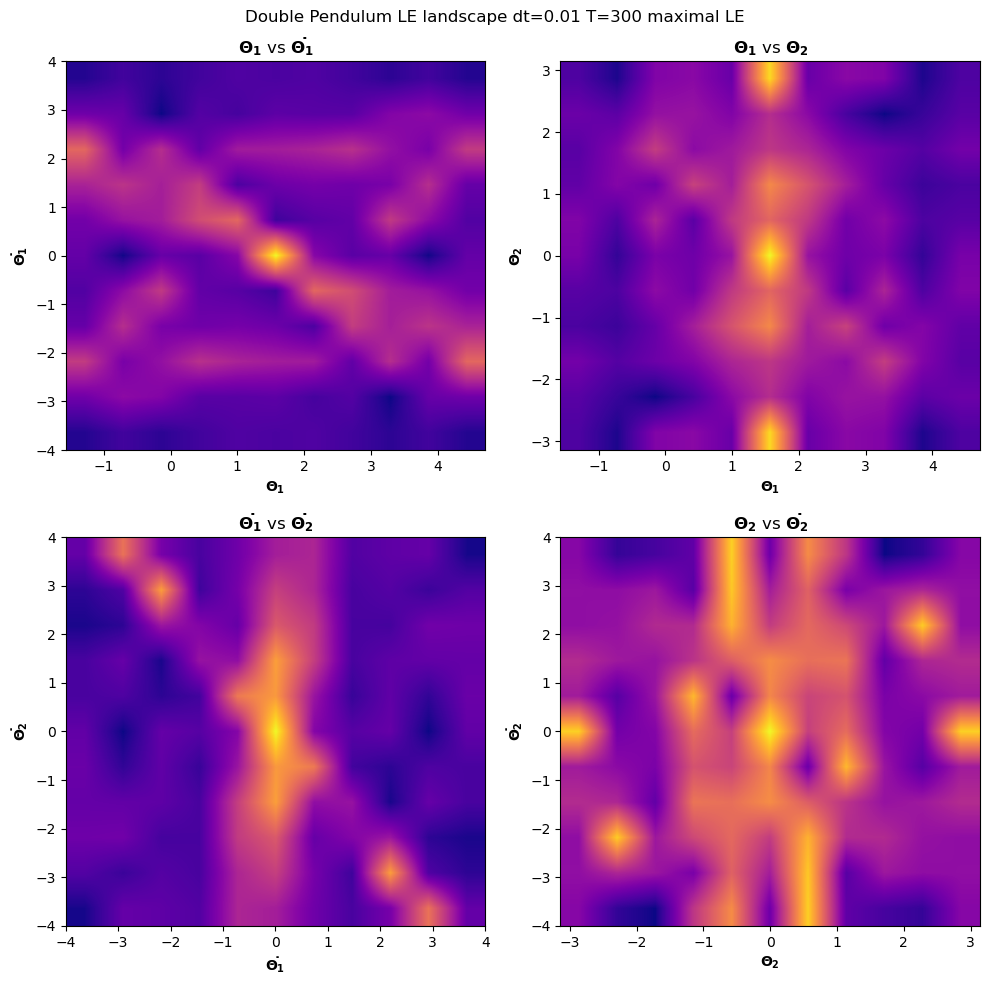

In [22]:
zs1 = np.load('/home/phu/Downloads/DP_experiment/precal_dp_300_001.npy')
X_reshaped = np.load('/home/phu/Downloads/DP_experiment/precal_dp_points_300_001.npy')

# l1 = zs[:,0].reshape(21, 21, 21, 21)
# l1[10][10][15][10] = 100

# zs_sum_pos = []
# for i in zs1:
#     zs_sum_pos.append(sum(i[i>0]))
# zs = np.array(zs_sum_pos)
zs = zs1[:,0]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
l1 = zs.reshape(11, 11, 11, 11)[5,5,:,:]
ax1.imshow(np.flip(l1,1),extent=[-np.pi/2, 3*np.pi/2,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax1.plot(tjt[0],tjt[2],linewidth=3, c='white')
ax1.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\dot{\Theta_1}}$")
ax1.set_xlabel(r"$\mathbf{\Theta_1}$")
ax1.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$")
ax2 = fig.add_subplot(222)
l2 = zs.reshape(11, 11, 11, 11)[5,:,5,:]
ax2.imshow(np.flip(l2,1),extent=[-np.pi/2, 3*np.pi/2,-np.pi,np.pi],cmap='plasma',aspect='auto',interpolation="bilinear")
ax2.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\Theta_2}$")
ax2.set_xlabel(r"$\mathbf{\Theta_1}$")
ax2.set_ylabel(r"$\mathbf{\Theta_2}$")
ax3 = fig.add_subplot(223)
l3 = zs.reshape(11, 11, 11, 11)[:,5,5,:]
ax3.imshow(np.flip(l3,1),extent=[-4, 4,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
ax3.set_title(r"$\mathbf{\dot{\Theta_1}}$ vs $\mathbf{\dot{\Theta_2}}$")
ax3.set_xlabel(r"$\mathbf{\dot{\Theta_1}}$")
ax3.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
ax4 = fig.add_subplot(224)
l4 = zs.reshape(11, 11, 11, 11)[:,:,5,5]
ax4.imshow(np.flip(l4,1),extent=[-np.pi, np.pi,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax4.plot(tjt[1],tjt[3],linewidth=3, c='white')
ax4.set_title(r"$\mathbf{\Theta_2}$ vs $\mathbf{\dot{\Theta_2}}$")
ax4.set_xlabel(r"$\mathbf{\Theta_2}$")
ax4.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
fig.suptitle('Double Pendulum LE landscape dt=0.01 T=300 maximal LE')
fig.tight_layout()
plt.savefig('/home/phu/Dropbox/general_backup/mastering_chaos/DPLE_experiment/001300.png')

In [14]:
X_reshaped[np.argmax(zs)]

array([1.57079633, 0.        , 0.        , 0.        ])

In [7]:
zs[np.argmax(zs)]

6.189900279045105

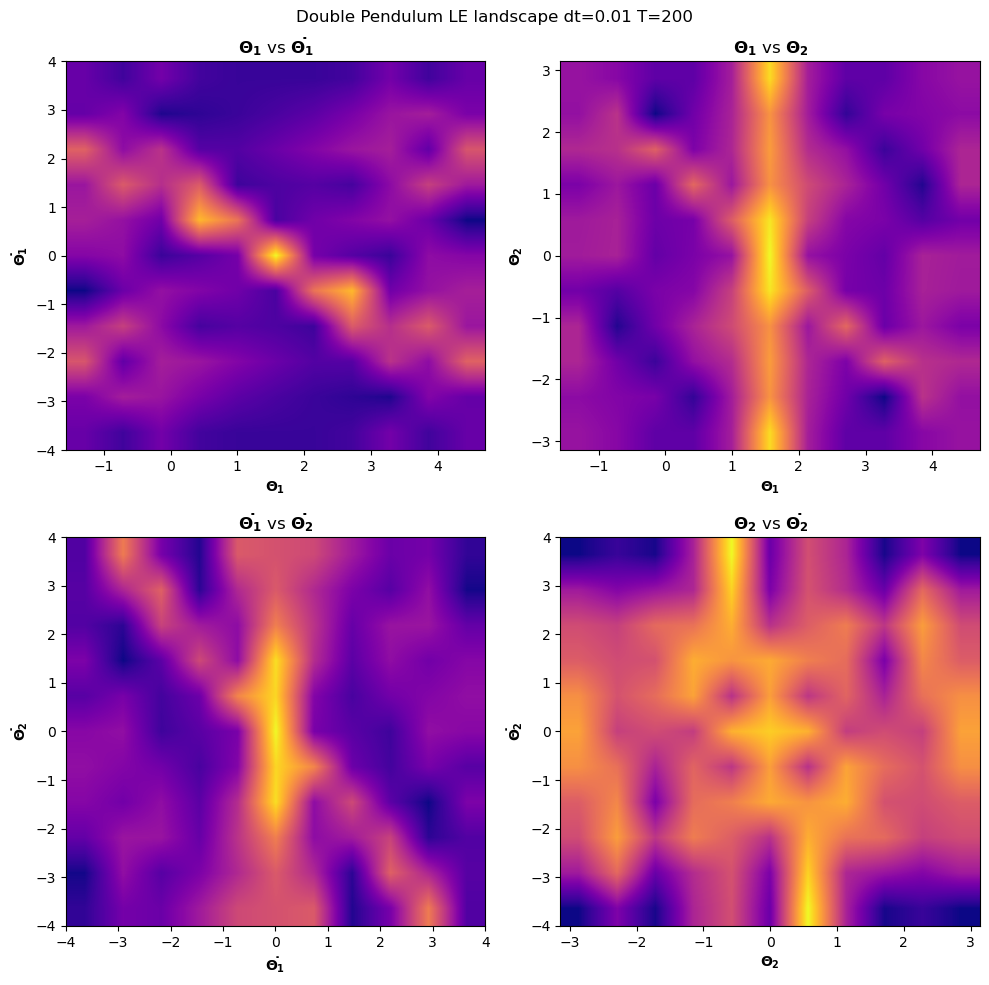

In [37]:
zs1 = np.load('/home/phu/Downloads/DP_experiment/precal_dp_200_001.npy')
X_reshaped = np.load('/home/phu/Downloads/DP_experiment/precal_dp_points_200_001.npy')

# l1 = zs[:,0].reshape(21, 21, 21, 21)
# l1[10][10][15][10] = 100

# zs_sum_pos = []
# for i in zs:
#     zs_sum_pos.append(sum(i[i>0]))
# zs = np.array(zs_sum_pos)
zs = zs1[:,0]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
l1 = zs.reshape(11, 11, 11, 11)[5,5,:,:]
ax1.imshow(np.flip(l1,1),extent=[-np.pi/2, 3*np.pi/2,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax1.plot(tjt[0],tjt[2],linewidth=3, c='white')
ax1.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\dot{\Theta_1}}$")
ax1.set_xlabel(r"$\mathbf{\Theta_1}$")
ax1.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$")
ax2 = fig.add_subplot(222)
l2 = zs.reshape(11, 11, 11, 11)[5,:,5,:]
ax2.imshow(np.flip(l2,1),extent=[-np.pi/2, 3*np.pi/2,-np.pi,np.pi],cmap='plasma',aspect='auto',interpolation="bilinear")
ax2.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\Theta_2}$")
ax2.set_xlabel(r"$\mathbf{\Theta_1}$")
ax2.set_ylabel(r"$\mathbf{\Theta_2}$")
ax3 = fig.add_subplot(223)
l3 = zs.reshape(11, 11, 11, 11)[:,5,5,:]
ax3.imshow(np.flip(l3,1),extent=[-4, 4,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
ax3.set_title(r"$\mathbf{\dot{\Theta_1}}$ vs $\mathbf{\dot{\Theta_2}}$")
ax3.set_xlabel(r"$\mathbf{\dot{\Theta_1}}$")
ax3.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
ax4 = fig.add_subplot(224)
l4 = zs.reshape(11, 11, 11, 11)[:,:,5,5]
ax4.imshow(np.flip(l4,1),extent=[-np.pi, np.pi,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax4.plot(tjt[1],tjt[3],linewidth=3, c='white')
ax4.set_title(r"$\mathbf{\Theta_2}$ vs $\mathbf{\dot{\Theta_2}}$")
ax4.set_xlabel(r"$\mathbf{\Theta_2}$")
ax4.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
fig.suptitle('Double Pendulum LE landscape dt=0.01 T=200')
plt.savefig('/home/phu/Dropbox/general_backup/mastering_chaos/DPLE_experiment/001200.png')
fig.tight_layout()

In [38]:
X_reshaped[np.argmax(zs)]

array([ 2.82743339, -4.        ,  1.25663706, -2.4       ])

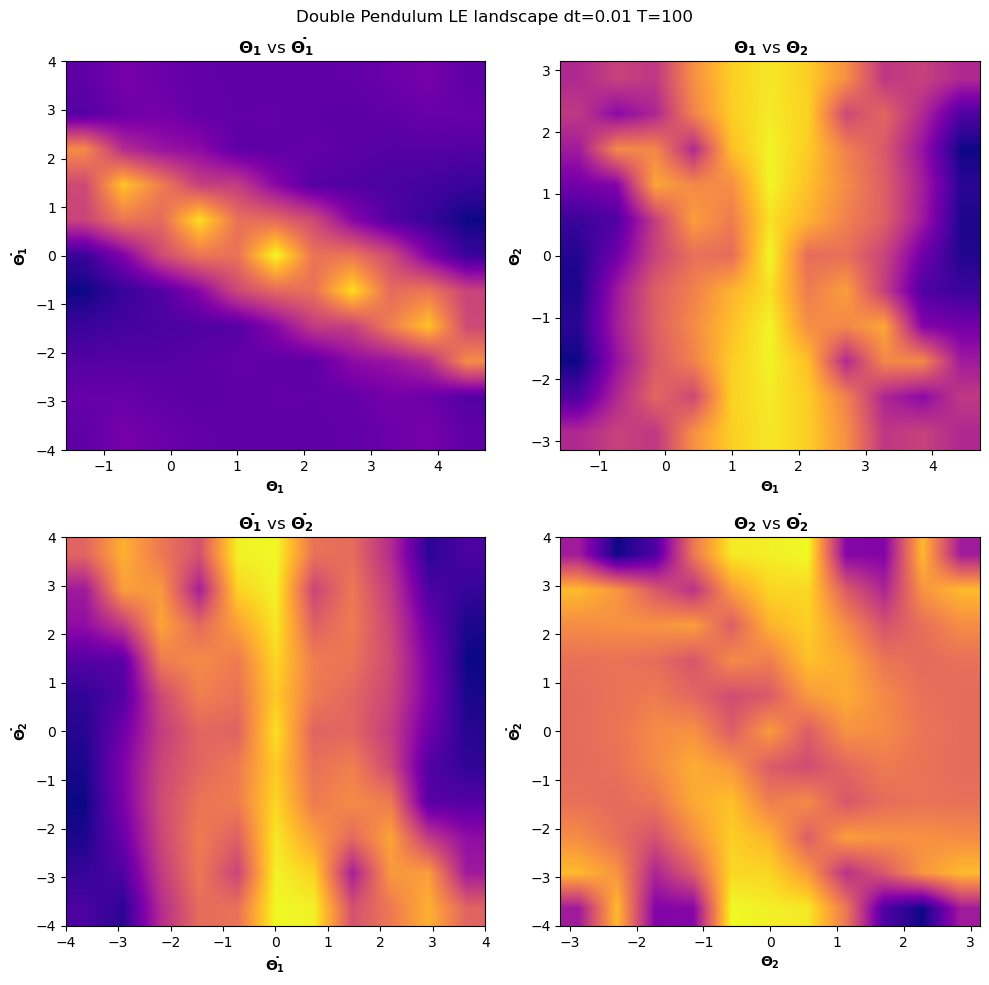

In [39]:
zs1 = np.load('/home/phu/Downloads/DP_experiment/precal_dp_100_001.npy')
X_reshaped = np.load('/home/phu/Downloads/DP_experiment/precal_dp_points_100_001.npy')

# l1 = zs[:,0].reshape(21, 21, 21, 21)
# l1[10][10][15][10] = 100

# zs_sum_pos = []
# for i in zs:
#     zs_sum_pos.append(sum(i[i>0]))
# zs = np.array(zs_sum_pos)
zs = zs1[:,0]
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
l1 = zs.reshape(11, 11, 11, 11)[5,5,:,:]
ax1.imshow(np.flip(l1,1),extent=[-np.pi/2, 3*np.pi/2,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax1.plot(tjt[0],tjt[2],linewidth=3, c='white')
ax1.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\dot{\Theta_1}}$")
ax1.set_xlabel(r"$\mathbf{\Theta_1}$")
ax1.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$")
ax2 = fig.add_subplot(222)
l2 = zs.reshape(11, 11, 11, 11)[5,:,5,:]
ax2.imshow(np.flip(l2,1),extent=[-np.pi/2, 3*np.pi/2,-np.pi,np.pi],cmap='plasma',aspect='auto',interpolation="bilinear")
ax2.set_title(r"$\mathbf{\Theta_1}$ vs $\mathbf{\Theta_2}$")
ax2.set_xlabel(r"$\mathbf{\Theta_1}$")
ax2.set_ylabel(r"$\mathbf{\Theta_2}$")
ax3 = fig.add_subplot(223)
l3 = zs.reshape(11, 11, 11, 11)[:,5,5,:]
ax3.imshow(np.flip(l3,1),extent=[-4, 4,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
ax3.set_title(r"$\mathbf{\dot{\Theta_1}}$ vs $\mathbf{\dot{\Theta_2}}$")
ax3.set_xlabel(r"$\mathbf{\dot{\Theta_1}}$")
ax3.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
ax4 = fig.add_subplot(224)
l4 = zs.reshape(11, 11, 11, 11)[:,:,5,5]
ax4.imshow(np.flip(l4,1),extent=[-np.pi, np.pi,-4,4],cmap='plasma',aspect='auto',interpolation="bilinear")
# ax4.plot(tjt[1],tjt[3],linewidth=3, c='white')
ax4.set_title(r"$\mathbf{\Theta_2}$ vs $\mathbf{\dot{\Theta_2}}$")
ax4.set_xlabel(r"$\mathbf{\Theta_2}$")
ax4.set_ylabel(r"$\mathbf{\dot{\Theta_2}}$")
fig.suptitle('Double Pendulum LE landscape dt=0.01 T=100')
plt.savefig('/home/phu/Dropbox/general_backup/mastering_chaos/DPLE_experiment/001100.png')
fig.tight_layout()

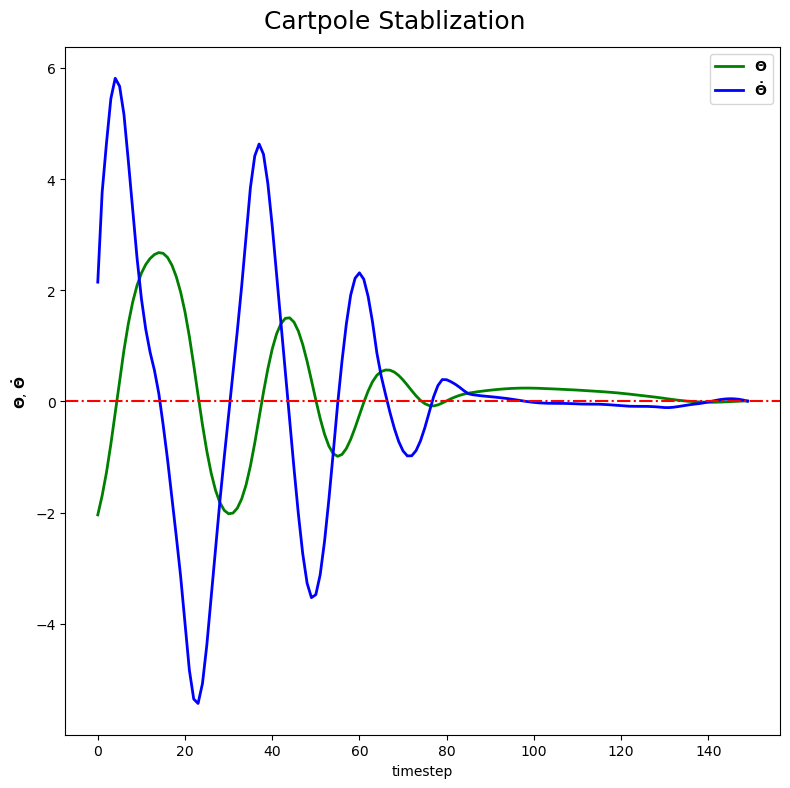

In [220]:
tjt=np.load("cartpole_trajectory.npy")
xfinal = tjt   
# xfinal[1][0:13] = xfinal[1][0:13]+2*np.pi
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
# ax.set_title(r"$\mathbf{\Theta_1}$ vs. timestep")
ax.set_xlabel('timestep')
ax.set_ylabel(r"$\mathbf{\Theta}$, $\mathbf{\dot{\Theta}}$")
# ax.plot(np.array(list(range(len(x[0])))), x[0])
ax.plot(np.array(list(range(len(xfinal[0][0:150])))), xfinal[0][0:150]-np.pi, linewidth=2,c = 'green',label=r"$\mathbf{\Theta}$")
ax.plot(np.array(list(range(len(xfinal[1][0:150])))), xfinal[1][0:150], linewidth=2, c = 'blue',label=r"$\mathbf{\dot{\Theta}}$")
# ax.axhline(y = np.pi, color = 'r', linestyle = 'dashdot')
ax.axhline(y = 0, color = 'r', linestyle = 'dashdot')
plt.legend(loc="upper right")

# ax1 = fig.add_subplot(212)
# ax1.set_title(r"$\mathbf{\dot{\Theta_1}}$ vs. timestep")
# ax1.set_xlabel('timestep')
# ax1.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$")
# # ax1.plot(np.array(list(range(len(x[1])))), x[1])
# ax1.plot(np.array(list(range(len(xfinal[1])))), xfinal[1], c = 'green')
# ax1.axhline(y = 0, color = 'r', linestyle = 'dashdot')


fig.suptitle('Cartpole Stablization', fontsize=18)
fig.tight_layout()
plt.savefig('coordinatesvstime_cartpole_le.png', transparent=True)

In [209]:
tjt=np.load("cartpole_trajectory.npy")

In [211]:
tjt.shape

(2, 201)